In [3]:
print ("hello world!")

hello world!


In [4]:
# ==============================
# Produção de Banana em PE (2023)
# ==============================

import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import os

dados = {
    "Município": [
        "Limoeiro", "Orobó", "Machados", "São Vicente Ferrer",
        "Timbaúba", "Macaparana", "Vicência"
    ],
    "Hectares_Colhidos": [900, 1000, 3000, 6000, 600, 2000, 9000],
    "Região": [
        "Agreste", "Agreste", "Agreste", "Agreste",
        "Zona da Mata", "Zona da Mata", "Zona da Mata"
    ]
}

df_banana = pd.DataFrame(dados)
df_banana.to_csv("hectares_2023.csv", index=False)
df_banana

,Município,Hectares_Colhidos,Região
0,Limoeiro,900,Agreste
1,Orobó,1000,Agreste
2,Machados,3000,Agreste
3,São Vicente Ferrer,6000,Agreste
4,Timbaúba,600,Zona da Mata
5,Macaparana,2000,Zona da Mata
6,Vicência,9000,Zona da Mata


In [5]:
!pip install geopandas matplotlib

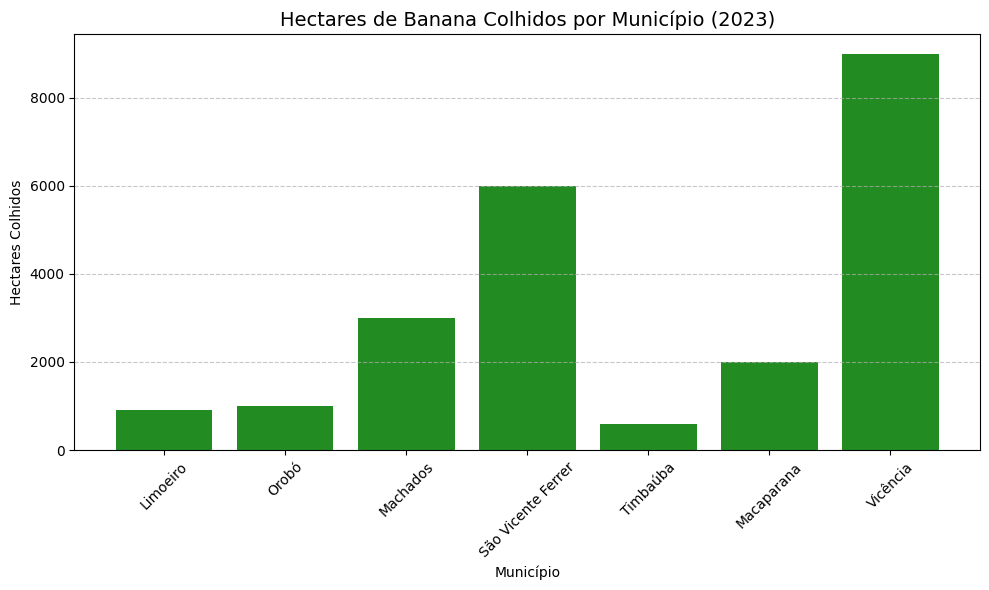

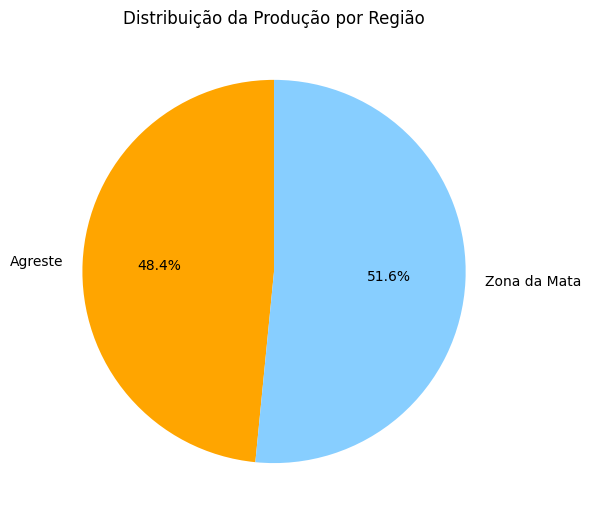


📊 Ranking dos municípios por hectares colhidos:
            Município  Hectares_Colhidos
6            Vicência               9000
3  São Vicente Ferrer               6000
2            Machados               3000
5          Macaparana               2000
1               Orobó               1000
0            Limoeiro                900
4            Timbaúba                600


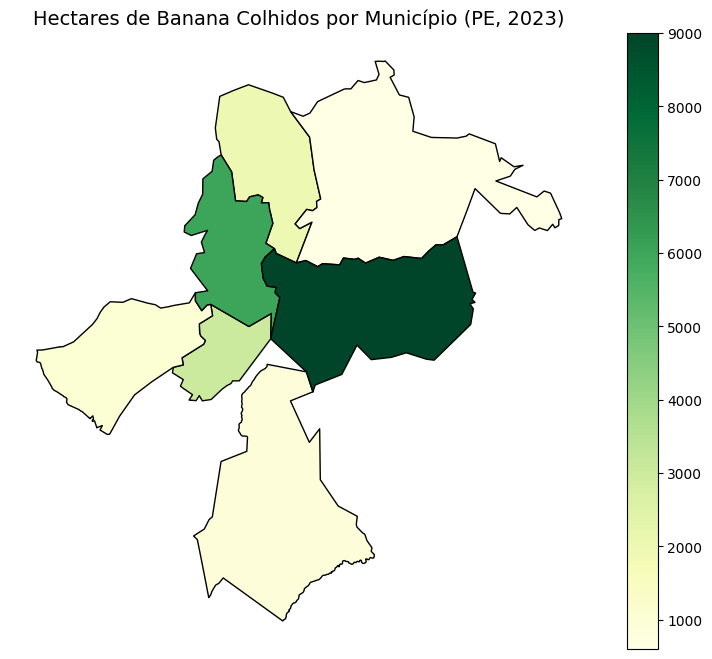

In [6]:
# -----------------------------
# Gráficos, ranking e mapa
# -----------------------------

os.makedirs("outputs", exist_ok=True)

# -----------------------------
# Gráfico de barras
# -----------------------------
plt.figure(figsize=(10,6))
plt.bar(df_banana['Município'], df_banana['Hectares_Colhidos'], color='forestgreen')
plt.title("Hectares de Banana Colhidos por Município (2023)", fontsize=14)
plt.xlabel("Município")
plt.ylabel("Hectares Colhidos")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# -----------------------------
# Gráfico de pizza
# -----------------------------
total_por_regiao = df_banana.groupby("Região")["Hectares_Colhidos"].sum()
plt.figure(figsize=(6,6))
total_por_regiao.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#FFA500','#87CEFF'])
plt.ylabel('')
plt.title("Distribuição da Produção por Região")
plt.tight_layout()
plt.show()

# -----------------------------
# Ranking de municípios
# -----------------------------
ranking = df_banana.sort_values(by='Hectares_Colhidos', ascending=False)
print("\n📊 Ranking dos municípios por hectares colhidos:")
print(ranking[['Município','Hectares_Colhidos']])

# -----------------------------
# Mapa choropleth
# -----------------------------
url = "https://raw.githubusercontent.com/tbrugz/geodata-br/master/geojson/geojs-26-mun.json"
gdf = gpd.read_file(url)

municipios_interesse = df_banana["Município"].str.upper().tolist()
gdf_pe = gdf[gdf["name"].str.upper().isin(municipios_interesse)]

gdf_pe = gdf_pe.merge(df_banana, left_on="name", right_on="Município")

fig, ax = plt.subplots(1,1, figsize=(10,8))
gdf_pe.plot(column="Hectares_Colhidos", cmap="YlGn", legend=True, edgecolor="black", ax=ax)
ax.set_title("Hectares de Banana Colhidos por Município (PE, 2023)", fontsize=14)
ax.axis("off")
plt.show()